In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("supermarket_sales.csv")

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nMissing values:")
print(df.isnull().sum())

df.head()


Shape: (2000, 14)

Columns:
Index(['Invoice_ID', 'Branch', 'City', 'Customer_Type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax', 'Total', 'Date',
       'Time', 'Payment', 'Rating'],
      dtype='object')

Missing values:
Invoice_ID       0
Branch           0
City             0
Customer_Type    0
Gender           0
Product_Line     0
Unit_Price       0
Quantity         0
Tax              0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


In [2]:
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
print("Total Sales:", df['Total'].sum())
print("Average Sale:", df['Total'].mean())
print("Highest Sale:", df['Total'].max())


Total Sales: 519280.69
Average Sale: 259.640345
Highest Sale: 499.91


In [4]:
branch_sales = df.groupby('Branch')['Total'].sum()
print(branch_sales)


Branch
A    179047.93
B    180821.79
C    159410.97
Name: Total, dtype: float64


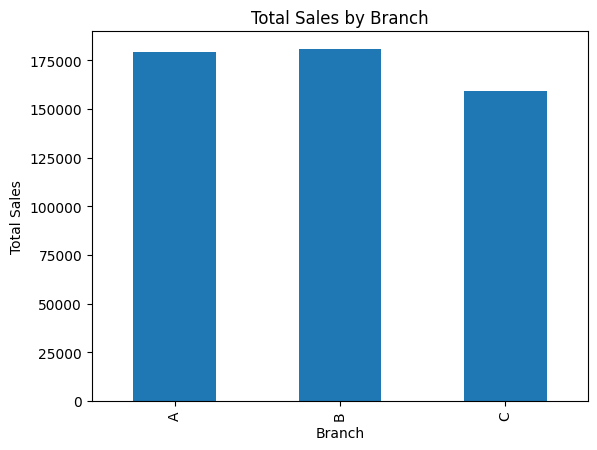

In [5]:
branch_sales.plot(kind='bar')
plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.show()


In [9]:
for col in df.columns:
    print(f"[{col}]")

df.columns = (
    df.columns
    .str.strip()           
    .str.replace('\n', '', regex=False)
    .str.replace('\r', '', regex=False)
)

print("\nCleaned columns:")
print(df.columns)

product_sales = df.groupby(df.columns[df.columns.str.contains("Product", case=False)][0])[
    df.columns[df.columns.str.contains("Total", case=False)][0]
].sum().sort_values(ascending=False)

print("\nProduct-wise sales:")
print(product_sales)


[Invoice_ID]
[Branch]
[City]
[Customer_Type]
[Gender]
[Product_Line]
[Unit_Price]
[Quantity]
[Tax]
[Total]
[Date]
[Time]
[Payment]
[Rating]

Cleaned columns:
Index(['Invoice_ID', 'Branch', 'City', 'Customer_Type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax', 'Total', 'Date',
       'Time', 'Payment', 'Rating'],
      dtype='object')

Product-wise sales:
Product_Line
Health & Beauty           96970.32
Sports & Travel           91177.89
Electronic Accessories    88995.19
Home & Lifestyle          86351.63
Food & Beverages          78233.94
Fashion Accessories       77551.72
Name: Total, dtype: float64


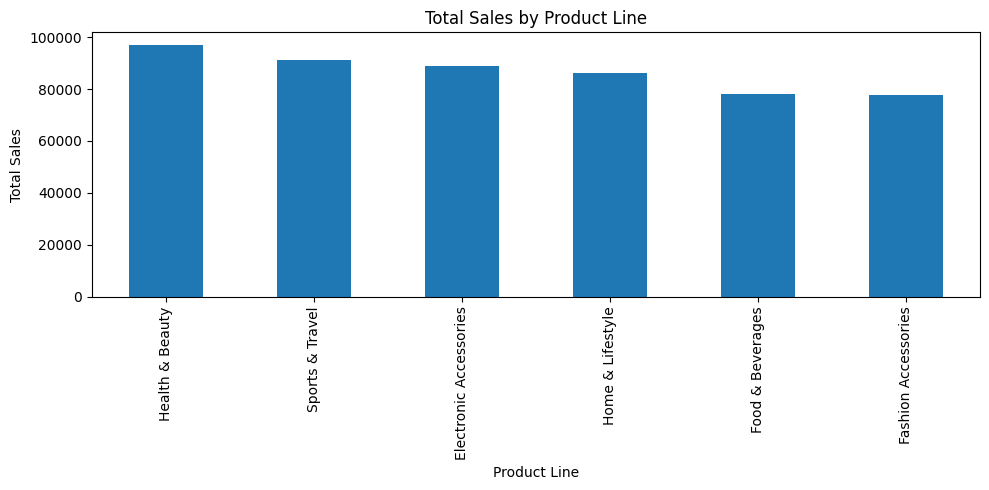

In [10]:
import matplotlib.pyplot as plt

product_sales.plot(kind='bar', figsize=(10,5))
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()
